<a href="https://colab.research.google.com/github/MUKESHRAJMAHENDRAN/Deep-Learning--fastai/blob/main/fastai_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Apr 13 06:24:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install fastai --upgrade

     |████████████████████████████████| 188 kB 5.4 MB/s 
     |████████████████████████████████| 60 kB 4.8 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data("https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip")

In [9]:
path.ls()

(#2) [Path('/root/.fastai/data/pizza_steak/test'),Path('/root/.fastai/data/pizza_steak/train')]

In [7]:
(path/"train").ls()

(#2) [Path('/root/.fastai/data/pizza_steak/train/pizza'),Path('/root/.fastai/data/pizza_steak/train/steak')]

In [11]:
(path/"train"/"pizza").ls()

(#750) [Path('/root/.fastai/data/pizza_steak/train/pizza/2967846.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/271779.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/1143057.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/2236914.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/2014717.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/3530210.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/2487039.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/2451169.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/1742542.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/861771.jpg')...]

In [12]:
(path/"train"/"steak").ls()

(#750) [Path('/root/.fastai/data/pizza_steak/train/steak/922752.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/952437.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/2062248.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/268444.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/1870942.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/1209120.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/6709.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/225990.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/2446660.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/143490.jpg')...]

In [24]:
food = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [25]:
dls = food.dataloaders(path)

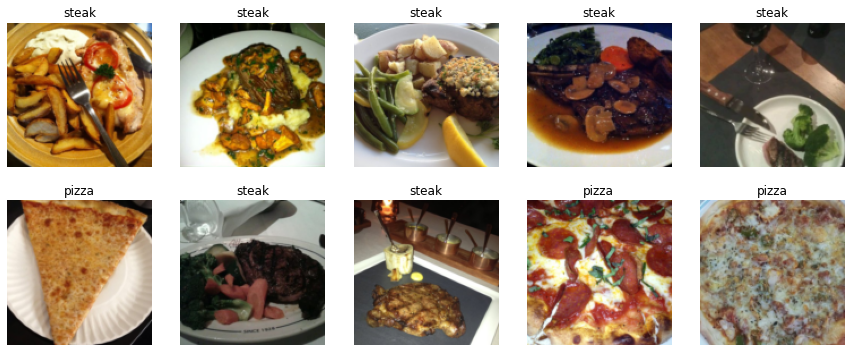

In [30]:
dls.valid.show_batch(max_n=10, nrows=2)

In [31]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.691084,0.332623,0.080000,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.227261,0.279907,0.072500,00:17
1,0.129990,0.259060,0.052500,00:15
2,0.088116,0.220684,0.057500,00:15
3,0.066869,0.214009,0.060000,00:15


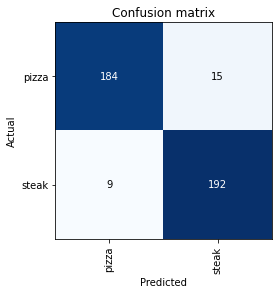

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

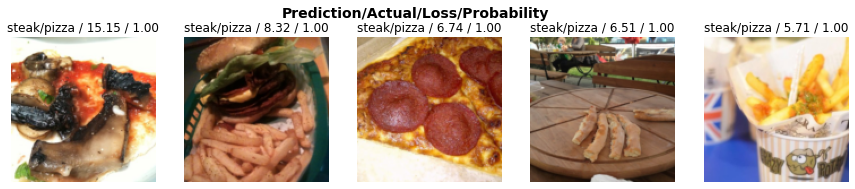

In [33]:
interp.plot_top_losses(5, nrows=1)

In [34]:
learn.predict("/content/pizza.jpeg")

('pizza', TensorBase(0), TensorBase([0.9986, 0.0014]))

In [35]:
learn.predict("/content/steak.jpg")

('steak', TensorBase(1), TensorBase([0.4776, 0.5224]))